# K-means Clustering 


In [62]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
df=pd.read_csv('Live.csv')

In [64]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [65]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [66]:
df.shape

(7050, 16)

In [67]:
df1=df.drop(columns=['Column1','Column2','Column3','Column4'],axis=1)

In [68]:
df1.duplicated().sum()

np.int64(51)

In [69]:
df_clean=df1.drop_duplicates()

In [70]:
df_clean.duplicated().count()

np.int64(6999)

In [71]:
df_clean.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


In [72]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         6999 non-null   object
 1   status_type       6999 non-null   object
 2   status_published  6999 non-null   object
 3   num_reactions     6999 non-null   int64 
 4   num_comments      6999 non-null   int64 
 5   num_shares        6999 non-null   int64 
 6   num_likes         6999 non-null   int64 
 7   num_loves         6999 non-null   int64 
 8   num_wows          6999 non-null   int64 
 9   num_hahas         6999 non-null   int64 
 10  num_sads          6999 non-null   int64 
 11  num_angrys        6999 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 710.8+ KB


In [73]:
df_clean['status_id'].unique().__len__()

6997

In [74]:
df_clean.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [75]:
df_clean['status_type'].unique().__len__()

4

In [76]:
df_clean=df_clean.drop(columns=['status_id','status_published'],axis=1)

In [77]:
df_clean.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [78]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6999 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    6999 non-null   object
 1   num_reactions  6999 non-null   int64 
 2   num_comments   6999 non-null   int64 
 3   num_shares     6999 non-null   int64 
 4   num_likes      6999 non-null   int64 
 5   num_loves      6999 non-null   int64 
 6   num_wows       6999 non-null   int64 
 7   num_hahas      6999 non-null   int64 
 8   num_sads       6999 non-null   int64 
 9   num_angrys     6999 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 601.5+ KB


In [79]:
df.shape

(7050, 16)

In [80]:
df_clean.duplicated().sum()

np.int64(2012)

In [81]:
df_clean=df_clean.drop_duplicates()

In [82]:
x=df_clean
y=df_clean['status_type']

In [152]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x['status_type']= le.fit_transform(x['status_type'])
y=le.transform(y)

c:\Users\user\OneDrive\Desktop\Training_Practice_Folder\AI&ML Lectures\my-env\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains previously unseen labels: [np.float64(2.0), np.float64(3.0)]

In [153]:
y

array([3, 1, 3, ..., 1, 1, 1], shape=(4987,))

In [84]:
# After fitting the encoder, check the classes_ attribute
print(le.classes_)

['link' 'photo' 'status' 'video']


In [85]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4987 entries, 0 to 7048
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    4987 non-null   int64
 1   num_reactions  4987 non-null   int64
 2   num_comments   4987 non-null   int64
 3   num_shares     4987 non-null   int64
 4   num_likes      4987 non-null   int64
 5   num_loves      4987 non-null   int64
 6   num_wows       4987 non-null   int64
 7   num_hahas      4987 non-null   int64
 8   num_sads       4987 non-null   int64
 9   num_angrys     4987 non-null   int64
dtypes: int64(10)
memory usage: 428.6 KB


In [86]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [87]:
cols=x.columns


In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()      # 1. Create the scaler object
x = ms.fit_transform(x)  # 2. Fit it to your data AND transform the data in one step

In [91]:
x

array([[1.00000000e+00, 1.12314225e-01, 2.43925679e-02, ...,
        6.36942675e-03, 1.96078431e-02, 0.00000000e+00],
       [3.33333333e-01, 3.18471338e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.81953291e-02, 1.12434493e-02, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.33333333e-01, 3.39702760e-03, 0.00000000e+00, ...,
        6.36942675e-03, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 4.24628450e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.33333333e-01, 7.45222930e-02, 5.71700810e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]], shape=(4987, 10))

In [129]:
from sklearn.cluster import KMeans
kmeans= KMeans(n_clusters=2,random_state=0)
kmeans.fit(x)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [130]:
x=pd.DataFrame(x,columns=[cols])

In [131]:
x.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [132]:
x

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
4982,0.333333,0.018259,0.000000,0.000000,0.018259,0.000000,0.000000,0.000000,0.000000,0.0
4983,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
4984,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
4985,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0


In [133]:
kmeans.inertia_

216.44959979988036

In [134]:
kmeans.cluster_centers_

array([[1.        , 0.07482253, 0.0382231 , 0.04218374, 0.06411617,
        0.06752974, 0.01099153, 0.01380213, 0.01013439, 0.0102349 ],
       [0.36444302, 0.0602732 , 0.00118256, 0.00108589, 0.05952479,
        0.00305341, 0.00351752, 0.00170369, 0.00416305, 0.00184154]])

In [135]:
labels=kmeans.labels_
print(labels)

[0 1 0 ... 1 1 1]


In [136]:
labels=kmeans.labels_

# check how many of the samples are correctly labelled
correct_labels=sum(y==labels)
print("Result: %d out of %d samples were correctly labeled." %(correct_labels,y.size))

Result: 2707 out of 4987 samples were correctly labeled.


In [137]:
print("Accuracy Score: {0:0.2f}".format(correct_labels/float(y.size)))

Accuracy Score: 0.54


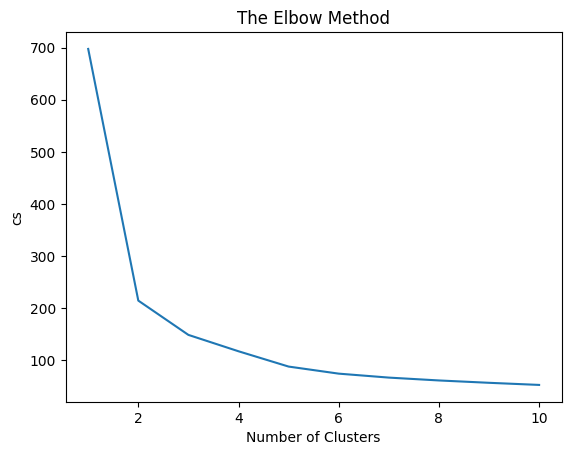

In [128]:
from sklearn.cluster import KMeans
cs=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("cs")
plt.show()

# For 3 Clusters

In [151]:
for i in range(1,11):
    from sklearn.cluster import KMeans
    kmeans= KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    x=pd.DataFrame(x,columns=[cols])
    print("\nTotal Clusters= ",i)
    labels=kmeans.labels_
    print(kmeans.inertia_)

    # check how many of the samples are correctly labelled
    correct_labels=sum(y==labels)
    print("Result: %d out of %d samples were correctly labeled." %(correct_labels,y.size))

    print("Accuracy Score: {0:0.2f}".format(correct_labels/float(y.size)))


Total Clusters=  1
697.5309067312284
Result: 60 out of 4987 samples were correctly labeled.
Accuracy Score: 0.01

Total Clusters=  2
216.44959979988036
Result: 2707 out of 4987 samples were correctly labeled.
Accuracy Score: 0.54

Total Clusters=  3
149.25314496909886
Result: 2796 out of 4987 samples were correctly labeled.
Accuracy Score: 0.56

Total Clusters=  4
117.61697728153663
Result: 2785 out of 4987 samples were correctly labeled.
Accuracy Score: 0.56

Total Clusters=  5
106.46219530080333
Result: 2810 out of 4987 samples were correctly labeled.
Accuracy Score: 0.56

Total Clusters=  6
79.57449070831814
Result: 2517 out of 4987 samples were correctly labeled.
Accuracy Score: 0.50

Total Clusters=  7
73.78923758604472
Result: 135 out of 4987 samples were correctly labeled.
Accuracy Score: 0.03

Total Clusters=  8
61.85423131340731
Result: 135 out of 4987 samples were correctly labeled.
Accuracy Score: 0.03

Total Clusters=  9
57.13145709348957
Result: 135 out of 4987 samples we